Datos diarios de retornos (%):
    Día  Estrategia_A  Estrategia_B
0     1          0.37          0.81
1     2          0.05         -0.03
2     3          0.44          0.11
3     4          0.88         -0.63
4     5          0.00         -0.19
5     6          0.00          0.14
6     7          0.91         -0.50
7     8          0.50          0.27
8     9         -0.11         -0.22
9    10          0.39         -0.07
10   11         -0.11         -0.22
11   12         -0.11          1.01
12   13          0.24          0.07
13   14         -0.84         -0.45
14   15         -0.74          0.49
15   16         -0.16         -0.53
16   17         -0.39          0.18
17   18          0.28         -0.90
18   19         -0.33         -0.58
19   20         -0.59          0.18

--- ESTADÍSTICOS DESCRIPTIVOS ---
Estrategia A: media = 0.03%, desv. típica = 0.48%
Estrategia B: media = -0.05%, desv. típica = 0.48%
Diferencia observada (A - B) = 0.09%


/var/folders/2x/_hywqhn13dj1ph71r6gjfy_h0000gn/T/ipykernel_17384/2816797731.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([retornos_A, retornos_B], labels=['Estrategia A', 'Estrategia B'])


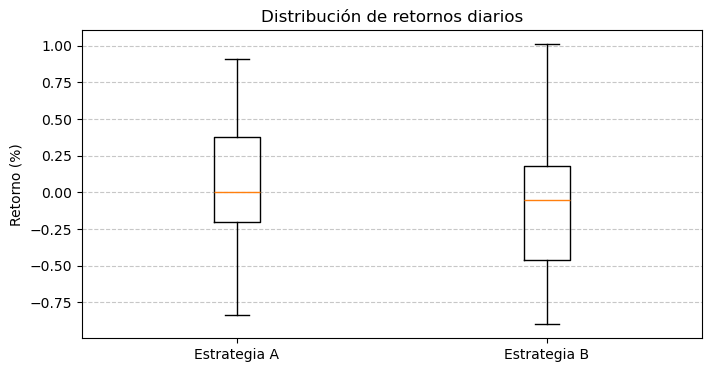


--- PRUEBA T DE STUDENT ---
Estadístico t = 0.571
p-valor = 0.5714
Conclusión: No rechazamos H0. No hay evidencia suficiente para afirmar que las medias sean diferentes.

--- INTERVALO DE CONFIANZA (95%) para la diferencia de medias ---
Diferencia observada = 0.09%
IC 95% = [-0.22%, 0.40%]
El intervalo SÍ contiene el 0, lo que respalda la no significancia.

--- INTERPRETACIÓN PARA EL NEGOCIO ---
Si el p-valor es menor a 0.05, podemos decir que la Estrategia A tiene un rendimiento
superior (o inferior) de manera estadísticamente significativa. En caso contrario,
la diferencia observada podría deberse a la variabilidad aleatoria del mercado.
Esta información ayuda a decidir si merece la pena asignar capital real a una estrategia.


In [1]:
# ============================================
# INFERENCIA ESTADÍSTICA EN ACCIÓN
# Comparación de dos estrategias de trading
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Fijamos semilla para reproducibilidad
np.random.seed(42)

# --------------------------------------------
# 1. Generamos datos simulados de retornos diarios (%)
# --------------------------------------------
# Estrategia A: retornos con media 0.12% y desviación 0.5%
# Estrategia B: retornos con media 0.08% y desviación 0.5%
# 20 días de trading

dias = 20
media_A = 0.12
media_B = 0.08
desviacion = 0.5

retornos_A = np.random.normal(loc=media_A, scale=desviacion, size=dias)
retornos_B = np.random.normal(loc=media_B, scale=desviacion, size=dias)

# Redondeamos para que sea más legible
retornos_A = np.round(retornos_A, 2)
retornos_B = np.round(retornos_B, 2)

# Creamos un DataFrame para visualizar
df = pd.DataFrame({
    'Día': range(1, dias+1),
    'Estrategia_A': retornos_A,
    'Estrategia_B': retornos_B
})
print("Datos diarios de retornos (%):")
print(df)

# --------------------------------------------
# 2. Análisis descriptivo básico
# --------------------------------------------
media_A_obs = np.mean(retornos_A)
media_B_obs = np.mean(retornos_B)
std_A_obs = np.std(retornos_A, ddof=1)
std_B_obs = np.std(retornos_B, ddof=1)

print("\n--- ESTADÍSTICOS DESCRIPTIVOS ---")
print(f"Estrategia A: media = {media_A_obs:.2f}%, desv. típica = {std_A_obs:.2f}%")
print(f"Estrategia B: media = {media_B_obs:.2f}%, desv. típica = {std_B_obs:.2f}%")
print(f"Diferencia observada (A - B) = {media_A_obs - media_B_obs:.2f}%")

# --------------------------------------------
# 3. Visualización: Boxplot
# --------------------------------------------
plt.figure(figsize=(8,4))
plt.boxplot([retornos_A, retornos_B], labels=['Estrategia A', 'Estrategia B'])
plt.title('Distribución de retornos diarios')
plt.ylabel('Retorno (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --------------------------------------------
# 4. Prueba de hipótesis (t-test para dos muestras independientes)
# --------------------------------------------
# Hipótesis nula (H0): la diferencia de medias poblacionales es 0 (no hay diferencia)
# Hipótesis alternativa (H1): las medias son diferentes (test bilateral)

# Realizamos la prueba t asumiendo varianzas iguales (se puede comprobar con test de Levene)
t_stat, p_valor = stats.ttest_ind(retornos_A, retornos_B, equal_var=True)

print("\n--- PRUEBA T DE STUDENT ---")
print(f"Estadístico t = {t_stat:.3f}")
print(f"p-valor = {p_valor:.4f}")

# Nivel de significación típico: 0.05
alpha = 0.05
if p_valor < alpha:
    print("Conclusión: Rechazamos H0. Existe evidencia estadísticamente significativa de que las medias son diferentes.")
else:
    print("Conclusión: No rechazamos H0. No hay evidencia suficiente para afirmar que las medias sean diferentes.")

# --------------------------------------------
# 5. Intervalo de confianza para la diferencia de medias
# --------------------------------------------
# Calculamos el intervalo de confianza al 95% para la diferencia (A - B)

# Grados de libertad (varianzas iguales)
gl = dias + dias - 2
# Cuantil t para 95% confianza
t_critico = stats.t.ppf(0.975, df=gl)

# Error estándar de la diferencia
# Varianza combinada
var_combinada = ((dias-1)*std_A_obs**2 + (dias-1)*std_B_obs**2) / gl
error_est = np.sqrt(var_combinada * (1/dias + 1/dias))

diferencia = media_A_obs - media_B_obs
ic_inf = diferencia - t_critico * error_est
ic_sup = diferencia + t_critico * error_est

print(f"\n--- INTERVALO DE CONFIANZA (95%) para la diferencia de medias ---")
print(f"Diferencia observada = {diferencia:.2f}%")
print(f"IC 95% = [{ic_inf:.2f}%, {ic_sup:.2f}%]")

if ic_inf > 0 or ic_sup < 0:
    print("El intervalo NO contiene el 0, lo que respalda el rechazo de H0.")
else:
    print("El intervalo SÍ contiene el 0, lo que respalda la no significancia.")

# --------------------------------------------
# 6. Interpretación en lenguaje de negocio
# --------------------------------------------
print("\n--- INTERPRETACIÓN PARA EL NEGOCIO ---")
print("Si el p-valor es menor a 0.05, podemos decir que la Estrategia A tiene un rendimiento")
print("superior (o inferior) de manera estadísticamente significativa. En caso contrario,")
print("la diferencia observada podría deberse a la variabilidad aleatoria del mercado.")
print("Esta información ayuda a decidir si merece la pena asignar capital real a una estrategia.")